## Lesson 06 Notes: Joukowski Transformation

In [97]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

## 1. Complex Numbers in Python

In [98]:
a = 3
b = 3
z = a + b + 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (6+1j)
The type of the variable is  <class 'complex'>


### Exercises for HW 2

In [99]:
a = 2.75 + 3.69j
b = 8.55 - 6.13j
answer1 = a * b

answer2 = 1.4 * numpy.exp(5.32j)

c = 7.51 - 9.15j
d = 4.43 + 9.64j

answer3 = c / d

print('Answer 1: ', answer1)
print('Answer 2: ', answer2)
print('Answer 3: ', answer3)

Answer 1:  (46.1322+14.692000000000004j)
Answer 2:  (0.799270785858-1.1494199454j)
Answer 3:  (-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski transformation

(-3, 3)

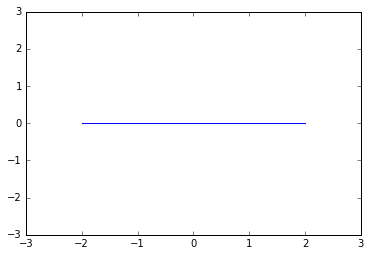

In [134]:
r = 1
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
zeta1 = zcirc + c**2/(zcirc)
zeta = zeta1
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

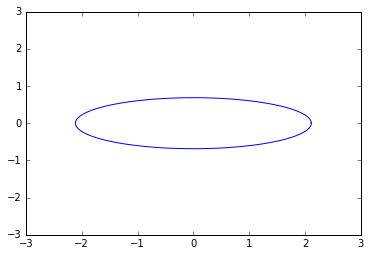

In [135]:
r = 1.4
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
zeta2 = zcirc + c**2/(zcirc)
zeta = zeta2
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

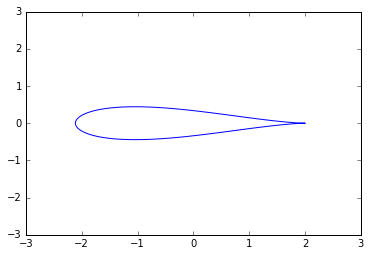

In [139]:
r = 1.2
c = 1
xc, yc = c-r,0
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta) + xc)+((r*numpy.sin(theta) + yc)*1j)
zeta2 = zcirc + c**2/(zcirc)
zeta = zeta2
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

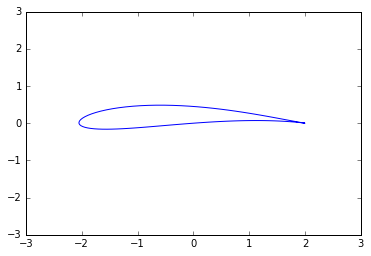

In [140]:
xc, yc = -0.1,0.1
c = 1
r = numpy.sqrt((c+xc)**2+yc**2)
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta) - xc)+((r*numpy.sin(theta) + yc)*1j)
zeta2 = zcirc + c**2/(zcirc)
zeta = zeta2
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)